# NumPy Basics
---
Today, we will learn about the NumPy library, which is the core library for numerical computing in Python and is used in many other packages, including Pandas, Scikit-Learn, and more. NumPy is so ubiquitous in data science that it is worth taking some time to get a good grasp of it. Moreover, it is a fundamental building block in Python's data science ecosystem and its syntax is used as the basis for more complex libraries such as TensorFlow and PyTorch.

We have mentioned in the previous sessions that Python is slow compared to other languages. Luckily, NumPy leverages some fast languages such as C and Fortran under the hood, allowing us to avoid the headaches of low-level programming while still enjoying their efficiency.

## Arrays
---
NumPy's main data structure is the *array*, a so-called `np.ndarray` to be precise, which is a generic n-dimensional array that can hold elements of the same type. Last week, we have seen that lists in Python are not intuitive for numerical computing and that they don't provide an interface for linear algebra operations.

For instance, we discussed that given a list `x = [1, 2, 3]`, we would like multiplication to act element-wise such as with scalar products in linear algebra, i.e., we would like to obtain `x * 2 == [2, 4, 6]` instead of `x * 2 == [1, 2, 3, 1, 2, 3]` as is the default behavior for lists. The same goes for vector addition.

In [ ]:
# In an ideal world, we would like to obtain [2, 4, 6]
x = [1, 2, 3]
x * 2

In [ ]:
# Similarly, we would now like to obtain [5, 7, 9]
y = [4, 5, 6]
x + y

Luckily for us, NumPy provides all these functionalities and moving from a list to an array is as easy as calling a function. Let's have a look.

In [ ]:
# First, we import NumPy under the alias np, this is the standard way of importing NumPy.
import numpy as np

In [ ]:
# We now cast these lists to NumPy array and observe the difference.
x = np.array(x) # Equivalent to x = np.array([1, 2, 3])
x * 2

In [ ]:
y = np.array(y)
x + y

In [ ]:
# Of course, we can still access single elements like we did with lists.
x[0], x[2]

Et voilà&hellip; using NumPy, we can now do some linear algebra with our programming language. Beautiful! 🤩

#### 🤔 Notice a few things:
- When we call `np.array`, we call the `array()` function from the `numpy` module (which we imported under the alias `np`). Recall from the previous sessions that this is how Python modules work: you import them and then access their functions/attributes.
- The output is not only different with respect to the values, but also with respect to the type of object. We don't have `[2, 4, 6]` which would be a list, but rather `array([2, 4, 6])` telling us that we are dealing with an array.
- Note that the single elements now have a special integer type, which is different from the default `int` type in Python. It's an `np.int64` type which is a 64-bit integer. We can ignore this detail for now but it is good to keep this difference in mind.
- In linear algebra terms, we did scalar multiplication and vector addition but be careful in thinking too much of linear algebra in the context of NumPy, let us look at some more examples&hellip;


In [ ]:
# The modulo operation is not defined on vector spaces, but works fine in NumPy 
x % 3

In [ ]:
# The same holds for the power operation
x ** 2

In [ ]:
# Multiplying two arrays gives us an element-wise multiplication
x * y

If we were pure mathematicians, we might be somewhat annoyed or confused by the above behavior. Luckily, we are data scientists and this behavior is going to be very useful to us.

NumPy doesn't only provide us with a convenient data structure for numerical computing, but it also comes with a flurry of useful mathematical functions. Once again, not that these are not defined on vector spaces, but will be applied element-wise if we apply them to NumPy arrays.

In [ ]:
# We can take the sine of every element
np.sin(x)

In [ ]:
# ... or we can take the exponential of every element
np.exp(x)

In [ ]:
# ... and of course, we can also chain these operations
np.exp(np.sin(x))

So far so good, but we are still missing something. In particular, we are missing the ability to do truly do linear algebra. For instance, if we think about the vector multiplication `x * y` we have done before, we would also like to be able to do vector multiplication in the linear algebra sense, i.e., let $$x = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, \qquad y = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$$ we would like to be able to do something such as $$x^\top y = 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 = 32$$ or $$x y^\top = \begin{bmatrix} 1 \cdot 4 & 1 \cdot 5 & 1 \cdot 6 \\ 2 \cdot 4 & 2 \cdot 5 & 2 \cdot 6 \\ 3 \cdot 4 & 3 \cdot 5 & 3 \cdot 6 \end{bmatrix} = \begin{bmatrix} 4 & 5 & 6 \\ 8 & 10 & 12 \\ 12 & 15 & 18 \end{bmatrix}.$$

But before we do this, we must first understand the *shapes* and *dimensions* of our arrays.

In [ ]:
# NumPy arrays have a `shape` attribute, which tells us the number of elements per dimension.
x.shape

In [ ]:
# We can also access the dimensionality directly
x.ndim

So `x` has 3 elements in its first dimension, and it is a 1-dimensional array. 

⚠️ Two things to keep in mind:
1. `.shape` does not tell us the number of elements in the array but the number of elements per dimension.
2. A 1-dimensional array is not exactly the same as a vector. Sometimes we will need to work with 2-dimensional arrays to represent vectors, e.g., a $3\times 1$ array to represent a vector with 3 elements. This can be a bit confusing at first but will make sense later on when working with matrices.

Luckily, we can easily reshape our arrays to change the number of elements per dimension.

In [ ]:
# Reshape x and y such that they have 3 elements in their first dimension 
# and 1 element in their second dimension
xr = x.reshape(3, 1)
yr = y.reshape(3, 1)

In [ ]:
# Let's look at the reshaped arrays
xr

In [ ]:
yr

Now we see that we don't have `array([1, 2, 3])` but rather `array([[1], [2], [3]])`, i.e., our arrays are now 2-dimensional. Let's verify this.

In [ ]:
# We expect the dimensionality to be 2
xr.ndim

In [ ]:
# We expect the shape to be (3, 1)
xr.shape

Alright, so we have our 2-dimensional arrays, can we now do our matrix multiplication?

In [ ]:
xr * yr

&hellip; nope, this is still an element-wise multiplication, with the difference that the resulting array is 2-dimensional. So how do we do matrix multiplication in NumPy?

We can use the `@` operator or the `dot` method to perform matrix multiplication.

In [ ]:
xr @ yr

&hellip; oh no! It seems like we have a problem. Did I lie to you?

No, it's simply that we have to be careful with the shapes of the arrays we are multiplying. In particular, we have to make sure that the number of columns in the first array matches the number of rows in the second array. This is linear algebra 101, we cannot just multiply arbitrary matrices / vectors. In this case, we need the transpose of `yr` (or `xr`) to perform the matrix multiplication. Once again, this is easily done in NumPy.

In [ ]:
# Transpose xr, this gives us a (1, 3) x (3, 1) -> (1, 1) multiplication
xr.T @ yr

In [ ]:
# ... or we can also transpose yr to obtain a (3, 1) x (1, 3) -> (3, 3) multiplication
xr @ yr.T

Finally, we get the result we wanted to obtain! If we were to look at the shapes and dimensions of the arrays, we would see that they have shape (1, 1) and (3, 3) respectively, both with two dimensions. Now, let's quickly look at indexing multidimensional arrays.

In [ ]:
# Store the 3x3 matrix above in the variable mat
mat = xr @ yr.T
# Check that the shape is (3, 3) and the dimensionality is 2
print("Shape is", mat.shape, "and the dimensionality is", mat.ndim)

In [ ]:
# What happens when we try to index a single element?
mat[0]

We have now returned an entire row of the matrix. This is not only the 0th element of the matrix but rather the first element of the first dimension!

In [ ]:
# We can also index a single element, say the 0th row and 1st column
mat[0, 1] # mat[0][1] would also work, but is less elegant and more error-prone

NumPy also provides ways to create arrays without having to manually enter the lists, however, not any type of array can be create this way. Here are a few useful ones.

In [ ]:
# Create a 1-dimensional array with 10 elements all equal to 1
np.ones(10)

In [ ]:
# We can also create arrays of zeros
np.zeros(10)

In [ ]:
# ... and often more useful, a range of increasing numbers from 0 to n-1
np.arange(10)

In [ ]:
# Or create a 1-dimensional array of linearly spaced numbers between 0 and 5
np.linspace(0, 5, 10) # (start, end, number of elements)

In [ ]:
# np.zeros and np.ones also allow us to create multidimensional arrays
np.zeros((3, 3))

In [ ]:
# Finally, the identity matrix is often useful and can be created with
np.eye(5) # 5x5 identity matrix

Keep in mind that using `np.arange` and `np.linspace`, we can only create 1-dimensional arrays. However, given what we have learned so far, we know that we can easily reshape them to create multidimensional arrays!

⚠️ Be careful when reshaping arrays, make sure you understand which elements are passed to which dimension!

In [ ]:
# Create a 2x5 array of integers from 0 to 9
# Note how the elements are filled row-wise!
np.arange(10).reshape(2, 5)

How can we create a 2x5 array of integers from 0 to 9 where the elements are filled column-wise? NumPy doesn't provide direct support for this, but we can use some tricks to achieve this&hellip; any ideas?

In [ ]:
# ➡️ ... code to follow once discussed, try it out yourself!

# Solution: Create a 5x2 array instead (i.e., the columns are [0,1],[2,3],...) and transpose it
np.arange(10).reshape(5, 2).T

### Broadcasting
---
Okay, one final thing to understand before you start working on an exercise by yourself. NumPy also supports addition and subtraction of arrays, **even when these have different shapes**! Now, of course, the shapes have to be somehow compatible. Let's look at an example.

In [ ]:
# Recall, xr is (3, 1) and mat is (3, 3). What happens when we add them?
mat + xr

The addition is applied element-wise again, i.e., the first element of `x` is added to the first row of the matrix `mat` and so on.

If we instead want to add the first element of `x` to the first column of `mat`, we can do so by reshaping `x` to be `(1, 3)` instead of `(3, 1)`.

In [ ]:
mat + xr.T

In [ ]:
# Of course, multiplication exhibits the same behavior
mat * xr

This behavior is also called *broadcasting*. In fact, we have seen this before when we were multiplying `x` and `y` in the first section but it wasn't so evident from two vectors with identical shapes as it is for `mat` and `xr`.

It takes a while to get used to this behavior, but it is a very powerful feature of NumPy **that you will be using all the time**. I cannot stress this enough, **you will be using broadcasting all the time**, the fastest you are about thinking how the elements of your arrays are aligned and broadcasted, the more efficient you will be able to work. 

Oh, and most importantly, as we mentioned earlier, NumPy is a fundamental building block in Python's data science ecosystem, which means that **broadcasting will work the same way in all packages you will use later on**!

Long story short, try it out, make mistakes, learn from them, and soon enough, it will become second nature to you.

🙀 🤯 [The official NumPy documentation on broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) is much more detailed than this notebook and provides a few examples with illustrations. It is also somewhat more involved, but if you have some spare time, it is great resource to look at.

⚠️ One last word of caution before we end this section: broadcasting only works when the shapes are compatible. But more importantly, **you might sometimes believe that broadcasting is applied in a certain dimension, while it is applied in another dimension**. This is a common source of bugs and mistakes. Make sure you understand the shape of your arrays and how broadcasting works before using it blindly.

In [ ]:
# An example where broadcasting fails, a 2-dimensional array and a 3x3 matrix
x = np.array([1, 2])
mat + x

#### ➡️ ✏️ Your turn
You have recently created your own startup and, as a good data scientist, you want to quantitatively understand how your business is doing. You have the following data at hand:
- `sales`: a $3\times 4$ matrix containing the sales for 4 different items (the columns) for 3 different locations (the rows).
- `prices`: a 4-dimensional vector (1-dimensional array with 4 elements) containing the prices for the 4 items.
- `costs`: a 3-dimensional vector (1-dimensional array with 3 elements) containing the costs for the 3 locations per day.


You have the following tasks:
1. Compute the total revenue for each location. *Hint*: A single matrix multiplication will do the trick.
2. The first location was open for 15 days, the second for 30 days, and the thid for 20 days. Compute the profit for each location. *Hint*: `profit = revenue - total_costs`. Use your revenues from the previous task and subtract the costs (multiplied by the right factor!).
3. Which was the most profitable location/item combination? (E.g., the third item sold in the second location)

Now that you have some insights on your business, what changes would you make to your current strategy?

In [ ]:
# E.g., the first item was sold 500 times in the third location 
# and the third item was sold 150 times in the second location
sales = np.array([
    [100, 125, 130, 200],
    [300, 200, 150, 200],
    [500, 50, 300, 125]
])

# First item is sold at $30, second $100, third $50, fourth $40
prices = np.array([30, 100, 50, 40])
costs = np.array([1000, 1500, 2000])

#### Solution

**Part 1**: Compute the revenue by location.  
Here a simple matrix multiplication will do. To better understand the math, let us calls our sales matrix $S\in\mathbb{R}^{3\times 4}$ and our price vector $p\in\mathbb{R}^4$. I.e., we have

$$S = \begin{bmatrix}100 & 125 & 130 & 200\\ 300 & 200 & 150 & 200\\ 500 & 50 & 30 & 125\end{bmatrix}, \text{ and } p=\begin{bmatrix}30\\ 100\\ 50 \\40\end{bmatrix}.$$

The product of these two quantities is then

$$Sp = \begin{bmatrix}100 & 125 & 130 & 200\\ 300 & 200 & 150 & 200\\ 500 & 50 & 30 & 125\end{bmatrix}\begin{bmatrix}30\\ 100\\ 50 \\40\end{bmatrix} = \begin{bmatrix}100\cdot 30+125\cdot 100+130\cdot 50 + 200\cdot 40\\ 300\cdot 30 + 200\cdot 100 + 150\cdot 50+200\cdot 40 \\ 500\cdot 30 + 50\cdot 100 + 30\cdot 50 + 125\cdot 40\end{bmatrix} = \begin{bmatrix}30\,000\\ 44\,500\\ 40\,000\end{bmatrix}.$$


Thus, the multiplication $Sp$ effectively multiply each colum by the corresponding element of $p$ (i.e., first column with the first scalar in $p$) and sums them all together in a row-wise fashion. A bit annoying to do by hand, but NumPy is very fast here, even if had matrices with thousands of items and locations!

In [ ]:
# Note that we don't HAVE to reshape, but be careful!
revenue = sales @ prices 
revenue

**Part 2**: Compute the profit by location

Computing the profit seems easy enough, but the tricky part is that we need to first compute the total costs per location as we only have the *costs of keeping a location open for a day*. We can first apply element-wise multiplication, that is, we take the numbers of days location 1 was open, multiply that by the cost of keeping the location open for a day; we repeat this for location 2 and 3.

Once we have the total costs, it is just a matter of subtracting this quantity from our revenues obtained above.

In [ ]:
# We first need to create the array of days as it is not provided
days = np.array([15, 30, 20])
# We may then compute the total costs per location using element-wise multiplication
total_costs = costs * days
# The profit is now just a subtraction
profit = revenue - total_costs
profit

**Part 3**: Find the most profitable item/location combination.

Here, it is clear that we somehow want to keep our $3\times 4$ matrix, as it gives us a row per location and a column per item, i.e., all 12 possible combinations. Using broadcasting, we can solve this problem quite quickly. The idea is the following:

1. We can compute the revenue by item, this time, we broadcast the multiplication of each item and their price, i.e., no matrix multiplication as we don't want to sum anything up!
2. We now have a matrix or revenues, we can simply subtract the total costs per location (divided by 4 to split them equally amongst items), giving us the profit in each cell.

In [ ]:
# Notice how multiplying a 3x4 matrix and a 4x1 vector (element-wise) broadcasts the 4x1 array along the rows
revenue_by_item_location = sales * prices

# Now we do the same but using a 3x4 matrix and a 3x1 vector (element-wise subtraction) to remove the 3x1 vector along the columns
profits_by_item_location = revenue_by_item_location - costs.reshape(-1, 1) / 4

profits_by_item_location

## Reduction Functions
---

We already have a quite powerful toolset to work with arrays and do linear algebra numerically. However, thinking in terms of matrices and vectors is sometimes cumbersome. For instance, thinking about matrix multiplication to compute the revenue of your business is not always intuitive. It is correct, but sometimes we like to think in different terms. For instance, we may know that we have to multiply each item by its price and then sum it up by location, but it may not be as easy to see how this looks like in matrix form.

This is where the so-called *reduction* functions come into play. Reduction functions are functions that reduce the dimensionality of an array by applying a function to the elements of the array. For instance, the sum of all elements in an array is a reduction function.

E.g., suppose we wanted to know how many items we sold in total per location. We could in theory do a matrix multiplication with a vector of ones, but this is not very clear.

In [ ]:
# Total number of items sold per location the reduction function way
np.sum(sales, axis=1)

We must mention a few things:
- The first version gives us a $3\times 1$ matrix, as is expected from matrix multiplication.
- The second version gives us a 1-dimensional array with 3 elements, we have *reduced* the dimensionality by summing over the appropriate axis.
- We passed the keyword `axis=1` to the `sum` function, which tells us that we want to sum over the first dimension (be careful, in Python arrays start at the 0th dimension!).

Let's look at some more examples of how reduction work.

In [ ]:
# If we wanted to know the total number of times each item was sold
# we can sum over the 0th axis, resulting in a 1-dimensional array with 4 elements
np.sum(sales, axis=0)

In [ ]:
# Sometimes, we want to compute a reduction function without reducing the dimensionality.
# This can be achieved by passing `keepdims=True` to the function.
np.sum(sales, axis=1, keepdims=True)

In [ ]:
# If we don't pass the `axis` keyword, the function will reduce the entire array
# to a scalar, i.e., the total number of items sold
np.sum(sales)

Of course, we can also compute other reduction functions, such as the mean, the variance, the standard deviation, and so on.

In [ ]:
# Average number of items over all locations (per item type)
np.mean(sales, axis=0) 

In [ ]:
# Average number of items sold per location (over all item types)
np.mean(sales, axis=1)

In [ ]:
# Standard deviation of the number of items sold per location (over all item types)
np.std(sales, axis=0)

As one gets comfortable with NumPy, one will find that one will use reduction functions more and more, as they allow for a very concise and expressive way to compute summary statistics. Moreover, they are prevalent in all other data science packages we will be using later on. We will seldom fall back to using explicit loops or matrix multiplications. Reduction functions are just too convenient.

In fact, they are so prevalent that NumPy also allows to apply reduction functions as a *method of the array object*. This behavior will also come up in future packages, such as Pandas that we will cover next week.

In [ ]:
# Using sum as a method of the array object
sales.sum(axis=1)

In [ ]:
# Same goes for mean, std, etc.
sales.mean(axis=1)

## Filtering / Masking
---

Filtering is another important tool in data science. Since we will be dealing with *real world data*, we will often want to filter out or modify certain observations from our data in a programmatic way.

For instance, we may have a dataset of customer ratings of our products. We know that the ratings are on a scale from 1 to 10, but somehow our data is corrupted and contain some values that are not in this range.

In [ ]:
# The array containing our customer ratings
ratings = np.array([-3,2,2,6,7,5,8,7,1,7,4,-4,8,7,7,1,7,4,4,6,5,9,9,1,10,1,4,1,4,6,5,9,5,-3,-5,3,-6,2,8,-7,1,6,3,9,5,-4,3,9,2])
ratings

We quickly see that some numbers are negative. It's a small enough dataset that we can manually remove them, but this is not a scalable solution, which is what we will require for our projects.

Instead of looking at the numbers, we can try to see how many numbers are negative.

In [ ]:
# Apply element-wise comparison and check how many numbers are negative
negative_ratings = ratings < 0

# Use f-strings to format the output nicely
print(f"There are {negative_ratings.sum()} negative ratings in the dataset")
# Notice the {:.2%} formatting, this is a float formatting that shows the 
# number as a percentage with 2 digits after the decimal point
print(f"The negative ratings make up {negative_ratings.mean():.2%}, of the total ratings")

Now, what to do with these negative ratings unfortunately always depends on the application and the data collection process. Many situations could be possible, e.g.,

1. The negative ratings are a mistake and should be removed.
2. The negative ratings are actually positive, there is just a mistake in the data collection process that added a minus sign.
3. The negative ratings have happened because in the data collection process, the maximum rating (10) was subtracted from the rating, mistakenly resulting in a negative number.
4. The negative ratings are actually the lowest possible rating, which is 1.

Many other situations are possible and we will have to think about what makes sense in our application. However, let's consider how to tackle each of these problems.

First, suppose we needed to remove the negative ratings. In this case, we can use boolean indexing to mask out the negative ratings, the idea is that `negative_ratings` contains booleans that are true for all negative ratings and false otherwise. Since this boolean array has the same shape as `ratings`, we can simply use it to index into `ratings` and only keep the positive ratings.

In [ ]:
# The tilde sign negates the boolean array, i.e., true becomes false and vice versa
true_ratings = ratings[~negative_ratings]
true_ratings

In [ ]:
# Keep in mind that this array is now shorter than the original array!
ratings.shape, true_ratings.shape

Second, suppose that the negative ratings are actually positive, but there is just a mistake in the data collection. This case is actually quite trivial and we can simply use the absolute value of the ratings to correct for the mistake.

In [ ]:
true_ratings = np.abs(ratings)
true_ratings

Now, for the third case, things are started to get complicated. Given what we have learned in the last lecture, we might think of doing a loop that does something like this:

```python
# Notice that .size gives us the total number of elements in the array
for i in range(ratings.size):
    # If the rating is negative, we add 10 to it
    if ratings[i] < 0:
        ratings[i] += 10
```

This works, but it is not very efficient. If possible, we would like to avoid loops in NumPy and, instead, leverage the powerful broadcasting and vectorized operations that NumPy provides. Luckily, we can solve this problem using a nifty function called `np.where`.

You can think of `np.where` as *vectorized if-else statement*, e.g., `np.where(condition, value_if_true, value_if_false)`. Let's look at it in action.


In [ ]:
# If rating is negative, return rating + 10, otherwise return rating
true_ratings = np.where(ratings < 0, ratings + 10, ratings)
true_ratings

Finally, we can also use `np.where(ratings < 0, 1, ratings)` to solve the third case, it will work perfectly fine&hellip; but it would prevent us from learning something new!

So here comes the function `np.clip`, which will simply clip the values of the array to a given range.

In [ ]:
# Clip the ratings to the range [1, 10]
true_ratings = np.clip(ratings, 1, 10)
true_ratings

Phew&hellip; that's a lot to digest! But worry not, repetition is the key to mastering these topics. Make sure to play around with the code, try things out, and perhaps even apply some of these ideas in other undertakings linked to your own personal hobbies or interests!

So let's try solving an exercise to consolidate our understanding so far...

#### ➡️ ✏️ Your turn

You are the teaching assistant of a course on data science and would like to get some insights on the performance of your students.

You have the following data at hand:
- `exam_grades`: a 1-dimensional array containing the end-of-semester exam grades of 60 students.
- `midterm_grades`: a 1-dimensional array containing the midterm grades of the students,
- `attendance`: a 1-dimensional array containing the attendance of the students, i.e., percentage of classes attended (between 0 and 1, e.g., 0.9 for 90% attendance).

Your task is the following:
1. Compute the final grade for each student, where the final grade is the average of the exam and midterm grades, weighted by 70% and 30%, respectively.
2. What is the average final grade for all students? What is the standard deviation?
3. What is the percentage of students that have attended less than 70% of the classes?
4. What is the average final grade for students with 90% or more attendance?
5. What is the average final grade for students with less than 70% attendance?

In [ ]:
# The data: exam grades, midterm grades, and attendance
exam_grades = np.array([3,4.5,4,6,5.5,6,5,4.5,5,5,6,3.5,6,3.5,3.5,4.5,5,4,5,4.5,3.5,4,3,3.5,5,4.5,5,5,4,3.5,4,4.5,5,4.5,4.5,4.5,6,4,6,4.5,5,5,5.5,6,5,5,5,5,5,4.5,5,4.5,5.5,5,6,5.5,4,5.5,5,3.5])
midterm_grades = np.array([6,4,4.5,5,3.5,4,5.5,5,4.5,4,5,4.5,5.5,3,5.5,6,5.5,3.5,5,5.5,4,4.5,3,5,6,5,4,3.5,4.5,6,4.5,3,5.5,4,5,4.5,5.5,3,6,4.5,5,5.5,4,5,5,4.5,6,4,4.5,6,4,6,3,4,5,3.5,4,5,5,5])
attendance = np.array([.8,.5,.9,.8,1,.9,.8,.9,.8,.5,.9,.9,.7,.7,.6,1,.8,.6,.9,.9,.9,.6,.9,.9,.7,.9,.7,.9,1,.9,.6,.9,.9,.9,.9,.9,.7,.9,1,.9,.9,.7,.9,.7,.7,.9,.9,.5,.9,1,.7,.7,.7,.8,.9,1,.5,.7,.8,.5])

#### Solution

**Part 1**: Computing the final grade

Here, we have to take a weighted sum of the individual grades, we can do so by multiplying them by their respective factors (0.7 and 0.3) and add them up element wise.

In [ ]:
final_grades = 0.3 * midterm_grades + 0.7 * exam_grades
final_grades

**Part 2**: Computing the average final grade and its standard deviation

Let $x_1, x_2, \dots, x_n$ be the student grades the sample average $\hat{\mu}$ and standard deviation $\hat{\sigma}$ are given by $$\hat{\mu}=\frac{1}{n}\sum_{i=1}^n x_i \text{ and } \hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu})^2}.$$

We could code this ourselves, but NumPy already has some handy methods built-in for us!

In [ ]:
final_grades.mean()

In [ ]:
final_grades.std()

**Part 3**: Computing the percentage of students with less than 70% attendance

There are a few ways to solve this. One of them is to create an array of booleans. This array is `True` (equivalent to 1 in Python) when the student has attended less than 70% of the course and `False` (equivalent to 0 in Python) when the student has attended at least 70% of the course.

Once we have this array of `True` and `False` (or 1s and 0s), taking its sum will give us the number of students that attended less than 70% (as taking the sum will give us the sum of all the `True` values, i.e., all the 1s). We can then divide that by the number of students total (i.e., the size of the array). Or, alternatively, we can realized that this is nothing else but a mean again, and we can simply take the mean over this whole array.

In [ ]:
# Make a boolean array True when the attendance is lower than 70% and False otherwise
# Compute its mean, and we have the percentage of students with less than 70% attendance
np.mean(attendance < 0.7)

**Part 4**: Compute the average final grade for students with 90% or more attendance

Here, we want to do *boolean indexing*, i.e., we will first create a boolean array with true when the students have attended at least 90% of the course, very similar to what we did above. The important difference is that we are going to use this array to **index another array!**. Perhaps a picture is worth a thousand words here.

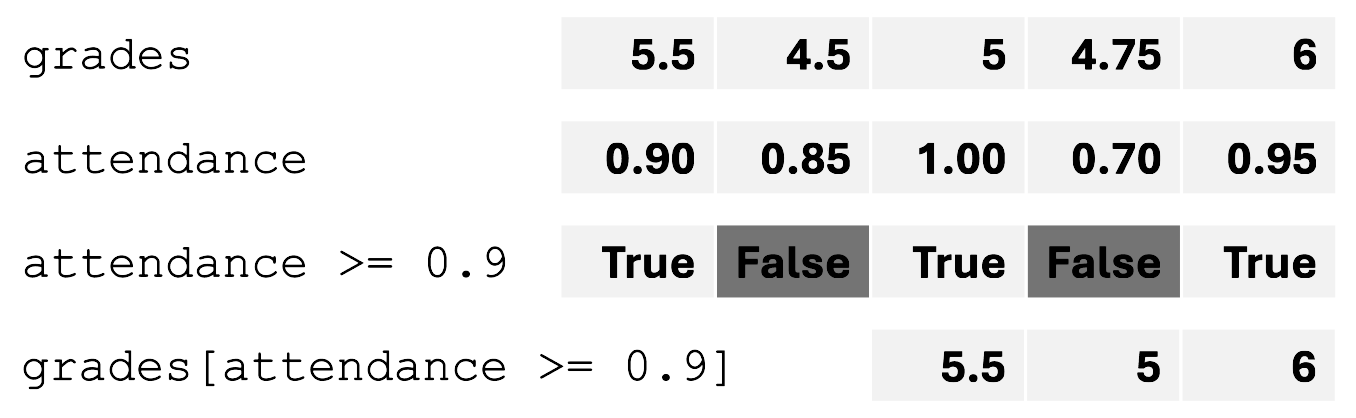


In [ ]:
# Indexing the final grades to keep only the ones with high attendance
# Notice the resulting array is shorter than the original one
final_grades_high_attendance = final_grades[attendance >= 0.9]
final_grades_high_attendance

In [ ]:
# Then we can just take the average (or we could have done everything in one step)
np.mean(final_grades_high_attendance)

**Part 5**: Computing the average grade of students with less than 70% attendance

Now that we have done part 4, this is just the same problem with a different attendance threshold.

In [ ]:
np.mean(final_grades[attendance < 0.7])

## Random Numbers
---

NumPy also provides functions to generate random numbers. This is an important tool in applications of data science, e.g., in machine learning, we often need to generate random numbers to train our models although this is something we don't think about much&hellip; but this is a topic for the bootcamp!

You might be wondering how a computer can generate random numbers given that it is a purely deterministic machinery. This is a bit of a complex topic that we don't need to worry too much about, but we may want to keep in mind that we are dealing with so-called *pseudorandom numbers* but for most practical purposes, they behave just like truly random numbers, with the distinction that we may be able to reproduce them (which is also very useful in applications of data science).

Let's look at some examples.

In [ ]:
# We can generate a random number uniformly distributed between 0 and 1
np.random.rand()

In [ ]:
# ... or we may generate many of them at once
np.random.rand(5)

In [ ]:
# ... even in matrix form
np.random.rand(3, 3)

⚠️ Notice how we used `np.zeros((3, 3))` before while we just used `np.random.rand(3, 3)` now to create $3\times 3$ matrices in both cases. This is somewhat nonintuitive at first, but you should get used to these things as time passes by.

If you are unsure of how to pass the arguments to a function, make sure you look up the documentation!

In [ ]:
# Look up the documentation of np.zeros
np.zeros?

In [ ]:
np.random.rand?

Back to our random numbers, we can also easily sample from the standard normal distribution.

In [ ]:
# Sample 10 numbers from the standard normal distribution
np.random.randn(10)

Uniform and standard normal distributions are the bread and butter of data science. As such, they come up more often than other, which is why they have their shorthands `np.random.rand` and `np.random.randn`.

However, we may also sample from other distributions, e.g., the Poisson distribution. NumPy also provides this functionality and the same for many other distributions.

In [ ]:
np.random.poisson(5, 10)

Wait a second&hellip; why does the above only provide 10 numbers and not a $5\times 10$ matrix?

This is because the first parameter, `5`, is the $\lambda$ parameter of the Poisson distribution. The second parameter, `10`, is the number of samples we want to draw.


In [ ]:
# The same as above but more explicitly
np.random.poisson(lam=5, size=10)

In [ ]:
# It is also easy to sample a matrix in this way
np.random.poisson(lam=5, size=(3, 3))

As stated before, the continuous uniform distribution on $[0, 1]$ and the standard normal distribution, i.e., $\mathcal{N}(0, 1)$, are so ubiquitous that they have their shorthands. But they also come in the same form as the poisson distribution with parameters that can be specified.

In [ ]:
# Sample 5 numbers from the uniform distribution on [1, 5]
np.random.uniform(low=1, high=5, size=5)

In [ ]:
# Sample a 3x3 matrix of standard normal random numbers
# Equivalent to np.random.randn(3, 3) but we could specify another mean (loc)
# and standard deviation (scale)
np.random.normal(loc=0, scale=1, size=(3, 3))

### Reproducibility
---
We have mentioned before that our numbers are not *truly* random. Arguably, this is not a big deal for most practical purposes and it is quite useful to ensure that our results are reproducible.

To ensure reproducibility, we can set a so-called *seed*, which is an integer that initializes the random number generator in a reproducible way.

In [ ]:
# Set the random seed to 72
np.random.seed(72)
# Generate 5 random numbers, note that your classmates will all get the same numbers!
np.random.rand(5)

In [ ]:
# But if we run the random number generator again, we get different numbers
np.random.rand(5)

In [ ]:
# Set the seed and draw again, notice how the numbers are the same as the first time
np.random.seed(72)
np.random.rand(5)

⚠️ You typically shouldn't set the seed multiple times in the same code. Normally, you wan't to set the seed once and then *the sequence of all randomly generated numbers from the same distribution will be the same*.

If you set the seed once and run through the whole code a single time, the results will always be the same. Be careful, however, when setting the seed, running through the code and running the same cell multiple times, this will *continue using up numbers from the sequence*.

E.g., the following behavior often occurs:

1. First cell, we set the seed.
2. Second cell, we draw 5 random numbers.
3. Third cell, we draw 5 random numbers.

If we run the second cell twice, the results in the third cell will be different than from what would have been the case had we run the second cell only once. This can be a bit tricky to debug and often goes under the radar. Feel free to try it out!

In [ ]:
# Notice how 3 draws of 1 number from the same distribution are the same 
# as the first 3 numbers in our draw of 5 numbers above
np.random.seed(72)
np.random.rand(1), np.random.rand(1), np.random.rand(1)

### 🙀 🤯 Monte Carlo Experiments
---
A good way to get a feeling for the power of random number generators is to run [Monte Carlo experiments](https://en.wikipedia.org/wiki/Monte_Carlo_method). The topic is too large to really be covered in depth in this course, but it would be criminal to learn about computational randomness without at least mentioning it.

In fact, from a personal perspective, I use Monte Carlo experiments all the time to get a feeling for the behavior of a certain system or to verify that my analytical solution to a certain problem is correct.

The main idea is to simulate a random experiment many times and observe the behavior of the results. This will give us an empirical understanding of the problem we are dealing with.

#### Estimating Expected Values

Suppose we have three random variables $X$ and $Y$ are both standard normal random variables. $Z$, however, is defined as $$Z = \begin{cases} Y &\text{ if } X \geq 0\\ |Y| &\text{ otherwise} \end{cases}$$

Suppose that we are interested in finding the expected value $\mathbb{E}[XZ]$. Since $Z$ depends on $X$, we cannot use independence as $\mathbb{E}[XZ] \neq \mathbb{E}[X]\mathbb{E}[Z]$.

We can, however, use our newly acquired skills to get a good empirical estimate for this value using a Monte Carlo experiment.

In [ ]:
# We will draw 1'000'000 samples, the more the better our approximation will be
n_samples = 1_000_000

# Draw X and Y
X = np.random.randn(n_samples)
Y = np.random.randn(n_samples)

# Compute Z
Z = np.where(X >= 0, Y, np.abs(Y))

# Compute the expected value
np.mean(X * Z)

This would have been much harder to solve analytically and using a few lines of code, we can already get a very good approximation $\mathbb{E}[XZ]\approx - 0.318$.

#### The Birthday Paradox

It is a well-known result that in a room of 23 people, there is a 50% chance that at least two people share the same birthday. This is something that one can solve analytically without too much effort, but sometimes, we just want to *see it for ourselves*.

So let's go ahead and simulate the birthday paradox step by step.

First, we can draw random birthdays (1 - 365, or rather 0 - 364) using the `np.random.randint` function.

In [ ]:
# Number of people
n_people = 23 

# A word of caution, the upper bound is exclusive! 
# I.e., we draw 23 random integers from [0, 365), not [0, 365]
birthdays = np.random.randint(0, 365, n_people)
birthdays

Second, now that we have our birthdays, we would like to know if there are any duplicates, i.e., if there are two people with the same birthday.

NumPy provides a very convenient way to check for duplicates using the `np.unique` function. Note, that this function gives back the unique elements, and, if you pass `return_counts=True`, it will also give back the number of times each element occurs.

In [ ]:
# Notice that there are two outputs: the unique elements and the number of times they occur
np.unique(birthdays, return_counts=True)

In [ ]:
# We can store each of the returns into separate variables
unique_birthdays, counts = np.unique(birthdays, return_counts=True)

# counts now only contains the number of times each unique element occurs
counts

Lastly, we want to check whether there are any duplicates, i.e., if there is an element in `counts` that is greater than 1, which we can do using a reduction function and logical comparison.

In [ ]:
# Gives an array of booleans, i.e., the comparison is applied element-wise
duplicates = counts > 1
duplicates

In [ ]:
# Finally, we can reduce the array to a single boolean value using the `any` function
np.any(duplicates)

All right, let's run this experiment 1000 times and see how often we get a duplicate birthdate!

In [3]:
import numpy as np
# Set a seed for reproducibility
np.random.seed(72)

# Initialize the number of runs
n_runs = 1_000

# Initialize the array that will store whether there are duplicates in each run
has_duplicates = np.zeros(n_runs, dtype=bool)

# Loop over all runs
for i in range(n_runs):
    # Draw birthdays
    birthdays = np.random.randint(0, 365, n_runs)

    # Check for duplicates
    unique_birthdays, counts = np.unique(birthdays, return_counts=True)
    has_duplicates[i] = np.any(counts > 1)

# Compute the percentage of runs that have duplicates
percentage_duplicates = np.mean(has_duplicates)
percentage_duplicates

1.0

Indeed, we find that in 53.3% of the runs, there are people with the same birthday! Increasing the number of runs will only make this result converge to its true value, try setting `n_runs` to 100 or 10'000 to see how the results differ.